# Proyecto de Internet de las Cosas: Monitor de Ambiente

Los dispositivos de Internet de las Cosas o IoT (Internet of Things) nos permiten interactuar con el entorno físico a través de [transductores](https://es.wikipedia.org/wiki/Transductor). Existen dos tipos de transdcutores:
- los *sensores* que detectan formas de energía, como pueden ser luz o fuerza, y las convierten en una salida de información legible, y
- los *actuadores* que reciben información y producen una salida consistente en alguna forma de energía física, como pueden ser luz o fuerza.

El dispositivo Pycom GPy/Pysense tiene un actuador: una luz LED RGB (WS2812), y los siguientes sensores:
- Temperatura y Humedad: [SI7006A20](https://www.silabs.com/sensors/humidity/si7006-13-20-21-34/device.si7006-a20-im?tab=specs) [(pdf)](https://www.silabs.com/documents/public/data-sheets/Si7006-A20.pdf)
   - Temperatura ($^\circ$C): -10 a 85 $^\circ$C con error $\pm$1$^\circ$C
   - Humedad relativa (%): 0 a 90% con error $\pm$5%
- Luz: [LTR329ALS01](https://optoelectronics.liteon.com/en-global/led/index/Detail/926)[(pdf)](https://optoelectronics.liteon.com/upload/download/DS86-2014-0006/LTR-329ALS-01_DS_V1.6.PDF)
   - Iluminancia: 0.01 a 64K lux (lúmenes por metro cuadrado)
- Presión barométrica (MPL3115A2)
- Aceleración (LIS2HH12)

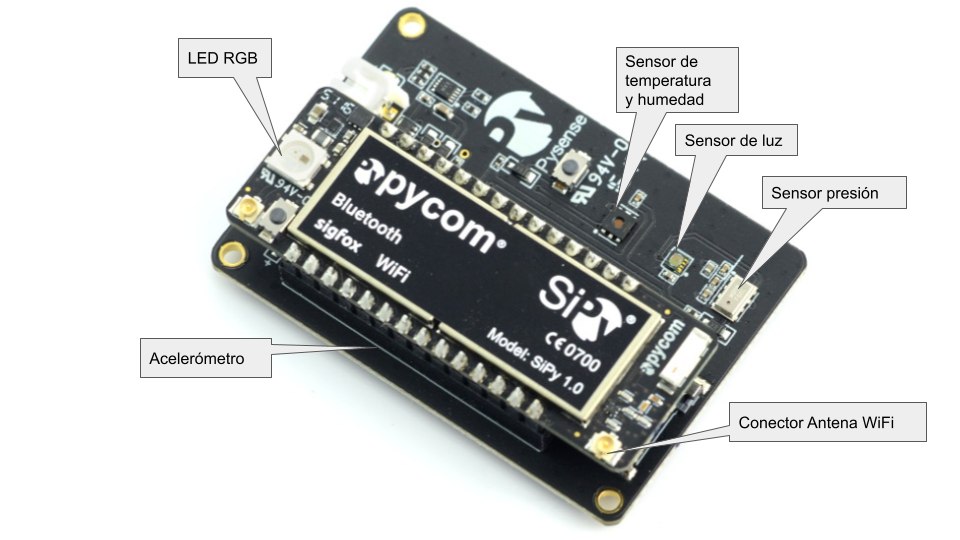

En este proyecto utilizaremos el dispositivo IoT para programar un monitor de diferentes variables ambientales (temperatura, humedad y luz). El objetivo es que el dispositivo sea capaz de leer estas variables del ambiente y representarlas utilizando un determinado color que encenderá en su luz LED. En esta etapa sólo utilizaremos los conceptos de la primera unidad de Informática (Operaciones), pero en cada nueva unidad introduciremos mejoras en nuestro proyecto.

# Conexión al nodo de Internet de las Cosas 

Para comunicarnos a través de WiFi con el dispositivo IoT debemos instalar algunas liberrías específicas que luego utilizaremos para acceder a los diferentes sensores y controlar la luz LED RGB.

In [ ]:
%pip install -i https://test.pypi.org/simple/ pycom-client-library
%pip install zeroconf

Una vez instaladas las librerías, debemos importar la librería "pycom" que nos permitirá conectarnos a la dirección IP del dispositivo a través de WiFi. Esta dirección IP la obtenemos analizando los datos de arranque del dispositivo en otro programa. 

In [ ]:
from pycom import *

ipaddr = input("Ingrese la dirección IP del nodo:")
node = SimplePycomNode(ip=ipaddr, port=8000)

Cada dispositivo ofrece diferentes métodos (similar a lo que sucede con las cadenas) que nos permiten interactuar con sus sensores y actuadores. El método .help() nos describe las funcionalidades disponibles. En esta actividad utilzaremos sólo alguna de ellas relacionadas a la luz LED RGB, y a los sensores de temperatura, humedad y luz.

In [ ]:
node.help()

# Interacción con actuadores y sensores

## Luz LED RGB

La luz LED RGB representa el único actuador disponible en el dispositivo (ya que el resto son sensores). Podemos controlar la luz LED RGB a través del método .post() que envía al dispositivo el color y el tiempo con el que queremos encender la luz.

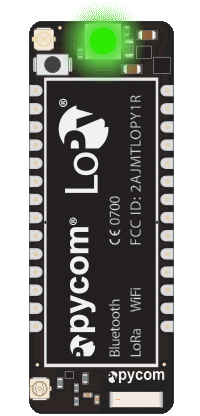

El modelo RGB (Red, Green, Blue) permite representar un color mediante la mezcla por adición de los tres colores de luz primarios: rojo, verde y azul. La intensidad de cada una de las componentes se mide según una escala que va del 0 al 255 (1 byte). También suele utilizarse el sistema hexadecimal para representar esta intensidad desde 0x00 (0) hasta 0xff (255). El valor 0 es el más apagado u oscuro (negro) mientras que el valor 255 el más claro o brillante.

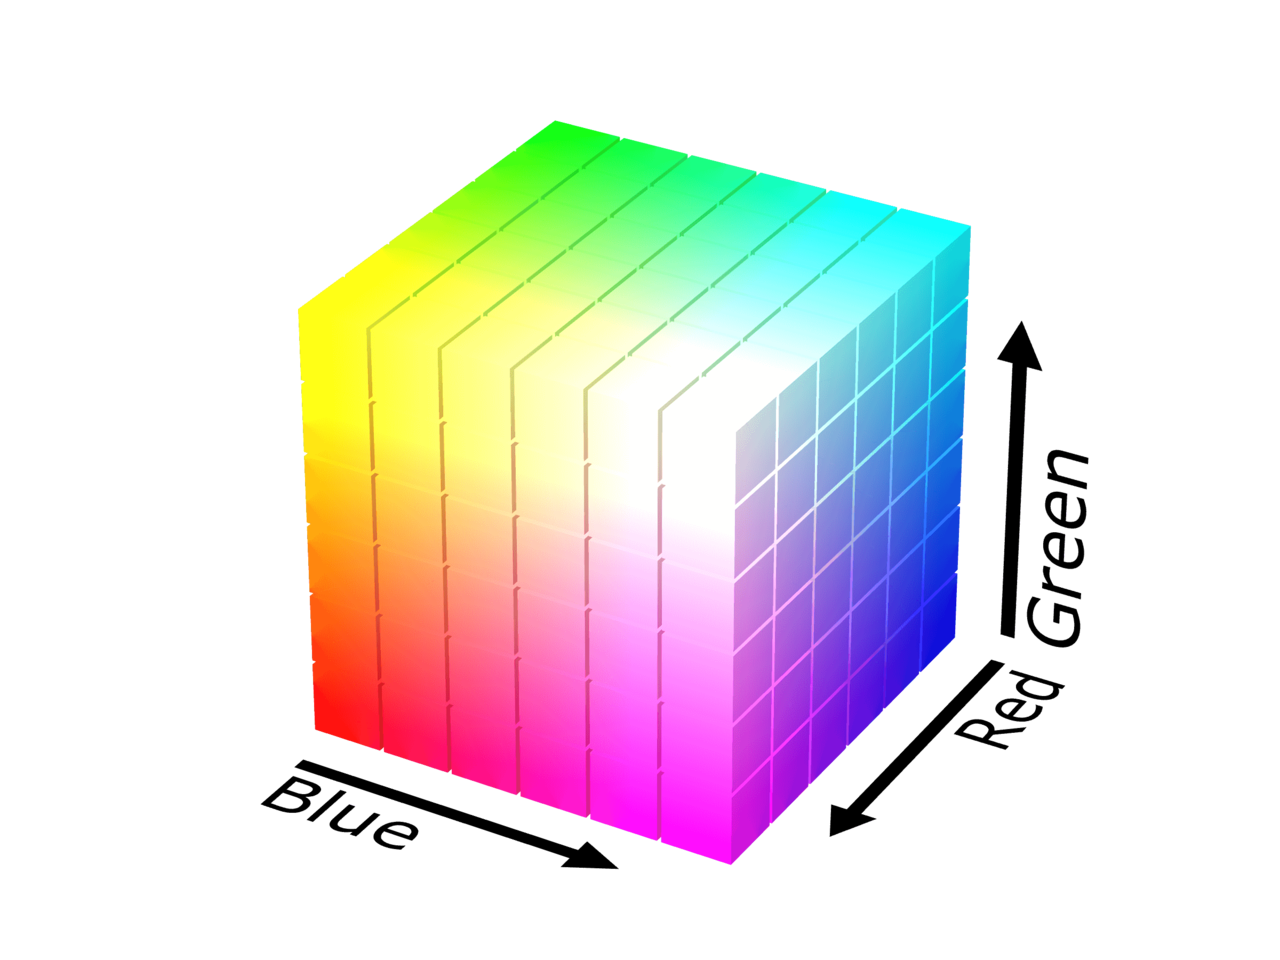

Esto nos permite configurar una amplia variedad de colores. Podemos primero pensar en encender sólo alguno de los colores (canales) con diferentes intensidades dentro del rango disponible de [0,255] o [0x00,0xff].

Diferentes intensidades para el color rojo:
- <font color='#ff0000'>Rojo más claro (255,0,0) 0xff0000</font>
- <font color='#800000'>Rojo poco claro (128,0,0) 0x800000</font>
- <font color='#400000'>Rojo muy oscuro (64,0,0) 0x400000</font>
- <font color='#000000'>Rojo apagado (0,0,0) 0x000000</font>

Diferentes intensidades para el color verde:
- <font color='#00ff00'>Verde más claro (0,255,0) 0x00ff00</font>
- <font color='#008000'>Verde poco claro (0,128,0) 0x008000</font>
- <font color='#004000'>Verde muy oscuro (0,64,0) 0x004000</font>
- <font color='#000000'>Verde apagado (0,0,0) 0x000000</font>

Diferentes intensidades para el color azul:
- <font color='#0000ff'>Azul más claro (0,0,255) 0x0000ff</font>
- <font color='#000080'>Azul poco claro (0,0,128) 0x000080</font>
- <font color='#000040'>Azul muy oscuro (0,0,64) 0x000040</font>
- <font color='#000000'>Azul apagado (0,0,0) 0x000000</font>

También podemos mezclar estos dos de estos colores en sus máximas intensidades y obtener colores secundarios:

- <font color='#ffff00'>Amarillo (255,255,0) 0xffff00</font>
- <font color='#00ffff'>Cian (0,255,255) 0x00ffff</font>
- <font color='#ff00ff'>Magenta o fucsia (255,0,255) 0xff00ff</font>

En general, podemos mezclar los tres colores RGB y obtener nuevos colores:
- <font color='#ff8000'>Naranja (255,128,0) 0xff8000</font>
- <font color='#ff0080'>Rosa (255,0,128) 0xff0080</font>

Finalmente, existe dos casos extremos
- <font color='#ffffff'>Blanco (255,255,255) 0xffffff</font> (Seleccionar para ver el blanco)
- <font color='#000000'>Negro (Apagado)  (0,0,0) 0x000000</font>


El siguiente método permite encender el LED RGB con un color determinado y por una cierta duración expresada en segundos

In [ ]:
node.post('color', color=0xff00ff, duration=10)

Podemos solicitar la intensidad de cada uno de los colores RGB dentro del rango [0,255] y luego generar el valor correspondiente en hexadecimal. Utilizamos los operadores de formato para que construyan una cadena con el valor hexadecimal deseado y luego convertimos esa cadena a un valor entero pero en base hexadecimal.

In [ ]:
r_int = int(input('Ingrese valor R (rojo) entre 0 y 255:'))
g_int = int(input('Ingrese valor G (verde) entre 0 y 255:'))
b_int = int(input('Ingrese valor B (blue) entre 0 y 255:'))
rgb_str = '%#04x%02x%02x' % (r_int, g_int, b_int)
#print(rgb_str)
print('Color RGB (int): %s (%d,%d,%d)' % (rgb_str, r_int, g_int, b_int))
rgb_int = int(rgb_str,16)
node.post('color', color=rgb_int, duration=10)

## Sensores de temperatura, humedad y luz
Podemos utilizar otros métodos para leer los valores de los diferentes sensores del dispositivo.

In [ ]:
#Obtenemos el valor del sensor de temperatura y luego lo imprimimos por pantalla
temp_val = node.get('temperature')
print('Temperatura (C):', temp_val)
#Obtenemos el valor del sensor de humedad y luego lo imprimimos por pantalla
hum_val = node.get('humidity')
print('Humedad Relativa (%):', hum_val)
#Obtenemos el valor del sensor de luz y luego lo imprimimos por pantalla
lux_val = node.get('lux')
print('Luz (lux):', lux_val))

# Proyecto IoT: Monitor Ambiental
Finalmente vamos a programar el dispositivo IoT como un "monitor ambiental" que pueda leer variables de nuestro ambiente (temperatura, humedad y luz) y comunicarlas a través de su LED RGB. Para lograr esto, vamos a asociar a cada uno de los tres colores RGB una de las variables de ambientales: el rojo para la temperatura, el verde para la humedad y el azul para luz. Para cada color asociaremos la máxima intensidad (255) al mayor valor del rango del sensor y la mínima (0) intensidad al menor valor del rango. Para lograr esto debemos normalizar el valor del sensor dentro de su rango para obtener un valor decimal entre 0 y 1, que luego multiplicaremos por 255 que es la máxima intensidad.

## Monitor de Temperatura: Intensidad del Color Rojo (R)

In [ ]:
#Rango temperatura entre -10 y 85
temp_max = 85.
temp_min = -10.
temp_range = temp_max - temp_min
temp_val = node.get('temperature')
print('Temperatura (C):',temp_val)
temp_col = (temp_val+temp_min)/temp_range*255
rgb_str = '%#04x%02x%02x' % (int(temp_col), 0, 0)
print('Color Rojo: %s (%d)' % (rgb_str, int(temp_col)))
rgb_int = int(rgb_str,16)
node.post('color', color=rgb_int, duration=10)

## Monitor de Humedad: Intensidad del Color Verde (G) 

In [ ]:
#Rango humedad relativa entre 0 y 90
hum_max = 90.
hum_min = 0.
hum_range = hum_max - hum_min
hum_val = node.get('humidity')
print('Humedad Relativa (%):',hum_val)
hum_col = (hum_val+hum_min)/hum_range*255
rgb_str = '%#04x%02x%02x' % (0, int(hum_col), 0)
print('Color Verde: %s (%d)' % (rgb_str, int(hum_col)))
rgb_int = int(rgb_str,16)
node.post('color', color=rgb_int, duration=10)

## Monitor de Luz: Intensidad del Color Azul (B)

In [ ]:
#Rango luz relativa entre 0.01 y 64K
lux_max = 64e3
lux_min = 0.01
lux_range = lux_max - lux_min
lux_val = node.get('lux')
print('Iluminancia:',lux_val)
lux_col = (lux_val+lux_min)/lux_range*255
rgb_str = '%#04x%02x%02x' % (0, 0, int(lux_col))
print('Color Azul: %s (%d)' % (rgb_str, int(lux_col)))
rgb_int = int(rgb_str,16)
node.post('color', color=rgb_int, duration=10)

# Desafío: Monitor Ambiental Integrado
Si bien en los casos anteriores logramos encender cada color del LED RGB asociado a su variable ambiental provista por un sensor, ahora combinaremos los tres colores para mostrar un único color resultante de las tres variables ambientales.

In [ ]:
temp_val = node.get('temperature')
temp_col = (temp_val+temp_min)/temp_range*255

hum_val = node.get('humidity')
hum_col = (hum_val+hum_min)/hum_range*255

lux_val = node.get('lux')
lux_col = (lux_val+lux_min)/lux_range*255

print('Temperatura:',temp_val, temp_col, 'Humedad:',hum_val, hum_col, 'Iluminancia:',lux_val, lux_col)
rgb_str = '%#04x%02x%02x' % (int(temp_col), int(hum_col), int(lux_col))
print(rgb_str)
rgb_int = int(rgb_str,16)
node.post('color', color=rgb_int, duration=10)

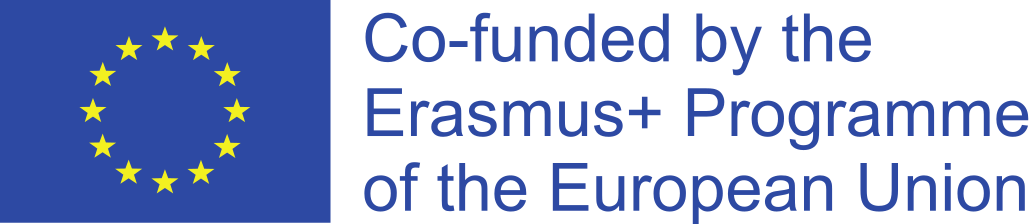